# Übung 2: Farben
##### Student: Adrian Kauz
***

### Imports

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

### Matplot-Params

In [21]:
%matplotlib inline
plt.rcParams['font.size'] = 6
plt.rcParams['figure.dpi']= 150

### Some helper functions

In [22]:
# For measuring time and performance comparison
class TimeStamp:
    def __init__(self, newTitle, newTime):
        self.title = newTitle
        self.time = newTime

class TimestampHelper:
    def __init__(self):
        self.timeList = list()
    
    def clear(self):
        self.timeList = list()
    
    def now(self, newTitle):
        self.timeList.append(TimeStamp(newTitle, cv2.getTickCount()))
        
    def print(self):
        if(1 < len(self.timeList)):
            print("Nr. Time           Delta     Title")
            print("----------------------------------")
            for x in range(1, len(self.timeList)):
                deltaTime = self.timeList[x].time - self.timeList[x-1].time
                message = "{0:0>2}: {1:0>3.4f}s -> {2:0>3.4f}s   \"{3}\"".format(x, self.timeList[x].time / cv2.getTickFrequency(), deltaTime / cv2.getTickFrequency(), self.timeList[x].title)
                print(message)
        else:
            print("No timestamps to print!")
                
timestamp = TimestampHelper()

### Detektion mit Farben

In unserem SkinApp Projekt befassen wir uns mit der Erkennung von Hautkrankheiten, zum Beispiel auf Händen. Als erstes muss dabei die Handfläche vom Hintergrund getrennt werden. Damit dies einfacher geht, haben wir eine Photobox entwickelt, die die Hände vor grünem Hintergrund aufnimmt. Sie sollen nun untersuchen, ob es damit tatsächlich einfacher ist die Handflächen oder Handrückseiten zu finden.





### Aufgabe 1: Hand Segmentierung

Als erstes sollen sie versuchen die Handflächen mittels der Farbe der Haut zu detektieren. Dazu ist es möglicherweise hilfreich das Bild in einer anderen Farbraum zu transferieren. Für Hautsegemntierung könnte sich zum Beispiel der YCrCb oder der HSV Farbraum einigen. Stellen Sie das Bild in diesen Farbräumen dar und suchen Sie dann entsprechende Schwellwerte um eine binäre Maske der Hand zu erstellen. Gerne können Sie auch auf dem Internet nach weiteren Möglichkeiten suchen.

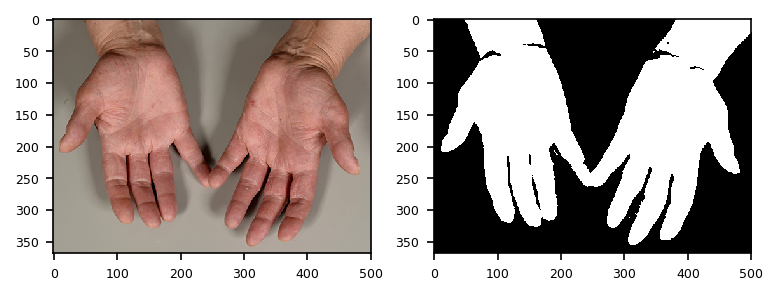

In [23]:
image_grey_back = cv2.imread('images/hand_grey_small.jpg')
image_grey_back = cv2.cvtColor(image_grey_back, cv2.COLOR_BGR2RGB)
image_grey_back_hsv = cv2.cvtColor(image_grey_back, cv2.COLOR_BGR2HSV)

# Adjust image a little
image_hsv_blur = cv2.blur(image_grey_back_hsv,(3,3))

# Detect color- and shadow-areas of the hand
image_hsv_hand = cv2.inRange(image_hsv_blur, np.array([30,20,0]), np.array([110,70,254]))
image_hsv_hand = cv2.bitwise_not(image_hsv_hand)
image_hsv_hand = cv2.erode(image_hsv_hand, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)), iterations = 2)
image_hsv_hand_shadow = cv2.inRange(image_hsv_blur, np.array([100,0,90]), np.array([179,254,254]))

# Now mix color- and shadow-areas together
image_hsv_hand_and = cv2.bitwise_and(image_hsv_hand,image_hsv_hand_shadow)

plt.subplot(1, 2, 1)
plt.imshow(image_grey_back)
plt.subplot(1, 2, 2)
plt.imshow(image_hsv_hand_and, cmap='gray')

### Aufgabe 2: Hintergrund Segmentierung

Im folgenden wird ein Bild mit grünem Hintergrund geladen. Führen Sie darauf die gleiche Segmentierung wie beim oberen Bild durch und stellen Sie diese dar.

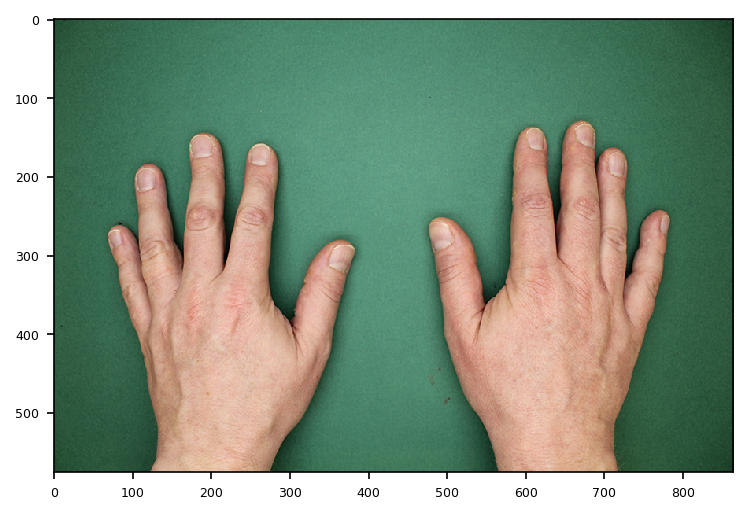

In [24]:
image_green_back = cv2.imread('images/hand_green_small.jpg')
image_green_back = cv2.cvtColor(image_green_back, cv2.COLOR_BGR2RGB)
plt.imshow(image_green_back)

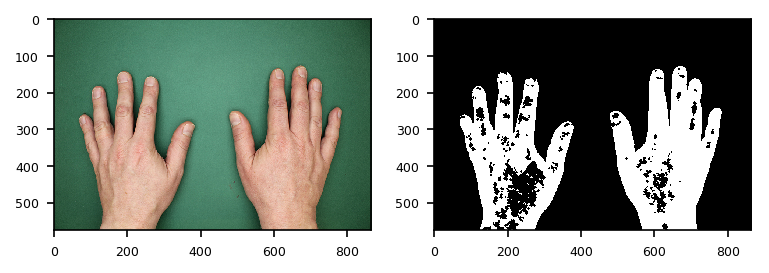

In [25]:
imageGreenBackHSV = cv2.cvtColor(image_green_back, cv2.COLOR_BGR2HSV)

# Adjust image for better contours
imageGreenBackHSVBlur = cv2.blur(imageGreenBackHSV,(3,3))

# Detect color- and shadow-areas of the hand
imageGreenBackHSVHand = cv2.inRange(imageGreenBackHSVBlur, np.array([30,20,0]), np.array([110,70,254]))
imageGreenBackHSVHand = cv2.bitwise_not(imageGreenBackHSVHand)
imageGreenBackHSVHand = cv2.erode(imageGreenBackHSVHand, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)), iterations = 2)
imageGreenBackHSVHandShadow = cv2.inRange(imageGreenBackHSVBlur, np.array([100,0,90]), np.array([179,254,254]))

# Now mix color- and shadow-areas together
imageGreenBackHSVHandAnd = cv2.bitwise_and(imageGreenBackHSVHand,imageGreenBackHSVHandShadow)

plt.subplot(1, 2, 1)
plt.imshow(image_green_back)
plt.subplot(1, 2, 2)
plt.imshow(imageGreenBackHSVHandAnd, cmap='gray')

Segmentieren Sie nun an Stelle der Haut den grünen Hintergrund. Können Sie damit eine bessere Unterscheidung zwischen Hand und Hintergrund erhalten?

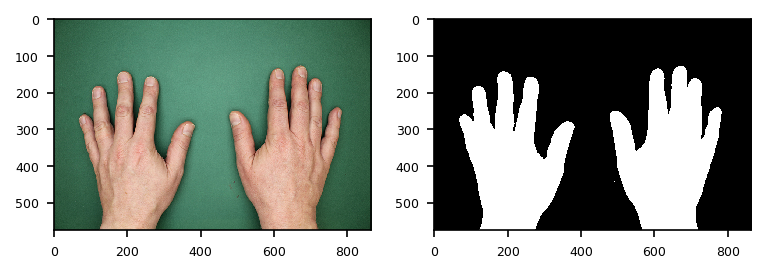

In [26]:
image_green_back = cv2.imread('images/hand_green_small.jpg')
image_green_back = cv2.cvtColor(image_green_back, cv2.COLOR_BGR2RGB)
image_green_back_hsv = cv2.cvtColor(image_green_back, cv2.COLOR_BGR2HSV)

# Adjust image a little
image_green_back_hsv_blur = cv2.blur(image_green_back_hsv,(3,3))

# Detect green background
image_green_back_only = cv2.inRange(image_green_back_hsv_blur, np.array([90,0,0]), np.array([130,254,254]))

plt.subplot(1, 2, 1)
plt.imshow(image_green_back)
plt.subplot(1, 2, 2)
plt.imshow(image_green_back_only, cmap='gray')

### Aufgabe 3: Bluescreen

Blue Screening wird in der Filmindustrie verwendet um Regionen in einem Bild, zum Beispiel ein blauer Hintergrund mit einem anderen Bild zu ersetzen.

Entwickeln sie ein Program, das 2 Bilder mit Hilfe dieser Technik aufeinander legt. Gehen Sie dazu wie folgt vor:

Berechnen sie für jeden Pixel die Transparenz α aufgrund des Farbwertes von I1 

Berechnen sie die Pixel des Ausgabebildes O, indem sie die beiden Bilder I1 und I2 mit Hilfe des α Werts übereinander legen. Eine mögliche Funktion dazu ist 

$$ O =\alpha*I_1 +(1−\alpha)*I_2 $$

Dies wird als Alpha Blendung bezeichnet.

Ein Beispielbild mit blauem Hintergrund, sowie ein Beispiel Hintergrund werden im anschliessenden Code geladen. Allerdings haben die Bilder noch nicht die gleiche Grösse. Sie können aber auch andere Bilder aus dem Internet verwenden.

Nr. Time           Delta     Title
----------------------------------
01: 60343.8556s -> 0.0673s   "Images loaded..."
02: 60343.8557s -> 0.0001s   "Start calculate alpha pixels with numpy ..."
03: 60343.8721s -> 0.0164s   "Done!"
04: 60343.8887s -> 0.0166s   "Start merging images..."
05: 60346.7008s -> 2.8122s   "Done!"


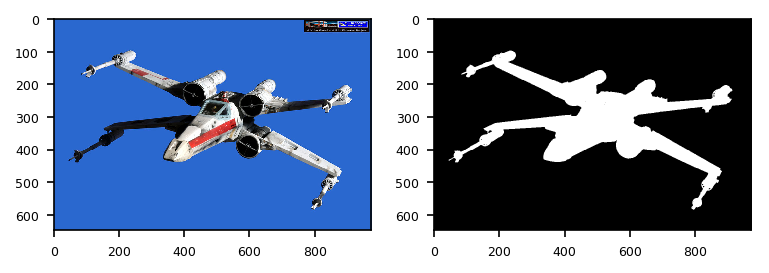

In [27]:
timestamp.clear()
timestamp.now("Start...")

# Foreground as RGB and HSV. Last one is used for generating alpha-mask
foreground = cv2.imread('images/star_wars_red_leader_small.jpg')
foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
foreground_hsv = cv2.cvtColor(foreground, cv2.COLOR_BGR2HSV)
foreground = foreground.astype(float)

# Background as RGB
background = cv2.imread('images/landscape-moon.jpg')
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
background = background.astype(float)
timestamp.now("Images loaded...")
# Size of the overlay-image. In this case the "X-Wing Fighter"
rowSize = len(foreground)
columnSize = len(foreground[0])

timestamp.now("Start calculate alpha pixels with numpy ...")

# Define color-range for transparent pixels. Should work for other colors too.
minHue = 1
defHue = 11
maxHue = 21

minSat = 76
defSat = 203
maxSat = 254

minVal = 76
defVal = 207
maxVal = 254

# For Hue
hueMask = np.logical_and(minHue <= foreground_hsv[:,:,0], foreground_hsv[:,:,0] <= maxHue)
# For Sat
satMask = np.logical_and(minSat <= foreground_hsv[:,:,1], foreground_hsv[:,:,1] <= maxSat)
# For Val
valMask = np.logical_and(minVal <= foreground_hsv[:,:,2], foreground_hsv[:,:,2] <= maxVal)

alphaMask = np.logical_and(hueMask, satMask)
alphaMask = np.logical_and(alphaMask, valMask)
alphaMask = np.invert(alphaMask)

alphaMask = alphaMask.astype(float)

# Add a little blur for softer edges (Anti-Aliasing)
# Good for small images.
alphaMask = cv2.blur(alphaMask,(3,3))

timestamp.now("Done!")

# Remove logo with a little help of the alpha-mask and set area as transparent
cv2.rectangle(alphaMask,(750,0),(972,50),(0),-1)

# Generate a new array for the final image
finalImage = background.copy()

# set position of the X-Wing fighter in the background image
offsetX = 250
offsetY = 100
timestamp.now("Start merging images...")
# Merge both images, together with the previous generated alpha-mask 
currBackPixel = None
currForePixel = None
currAlphaValue = None

for row in range(0, rowSize):
    for column in range(0, columnSize):
        currBackPixel = finalImage[row + offsetY,column + offsetX]
        currForePixel = foreground[row,column]
        currAlphaValue = alphaMask[row, column]
        
        currBackPixel[0] = currForePixel[0] * currAlphaValue + currBackPixel[0] * (1 - currAlphaValue)
        currBackPixel[1] = currForePixel[1] * currAlphaValue + currBackPixel[1] * (1 - currAlphaValue)
        currBackPixel[2] = currForePixel[2] * currAlphaValue + currBackPixel[2] * (1 - currAlphaValue)

        finalImage[row + offsetY,column + offsetX] = currBackPixel

timestamp.now("Done!")

# Ploting
plt.subplot(1, 2, 1)
plt.imshow(foreground/255)
plt.subplot(1, 2, 2)
plt.imshow(alphaMask, cmap='gray')

timestamp.print()

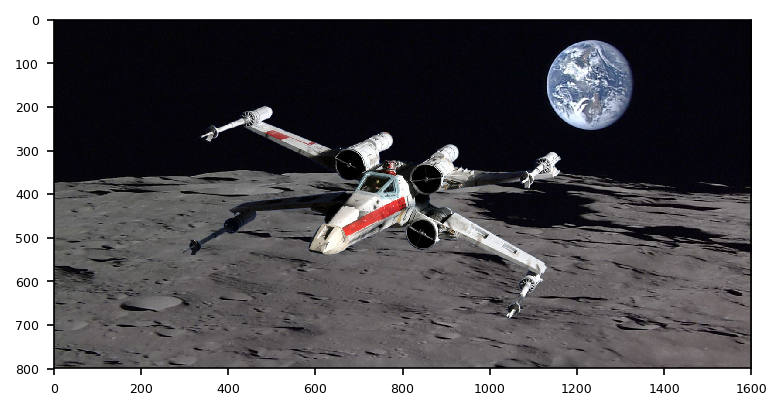

In [28]:
# Ploting final image
plt.imshow(finalImage/255)